# 第八次作业
### 姓名：张家琪
### 班级：2020211601
### 学号：2020211178

# 作业内容

## （1）用Numpy产生10000个均匀分布和高斯分布随机数，自行设定均匀分布的分布范围[a,b]，高斯分布的均值与方差

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# 高斯分布
mu=0
sigma=1
N=10000
g=np.random.normal(mu,sigma,N)

# 均匀分布
a=-1
b=1
u=np.random.uniform(a,b,N)

## （2）（3）用matplotlib中的hist函数统计生成噪声的概率密度函数，同时用numpy内置的mean、var函数计算两类噪声的均值与方差，与理论值进行比较。利用实际计算得到的均值与方差，根据理论公式绘制噪声的pdf曲线，并与实际曲线进行对比

高斯分布噪声为
$$
g(x)=\frac{1}{\sqrt{2\pi}\sigma}e^{-\frac{(x-\mu)^2}{2\sigma^2}}
$$
其中$\mu$为数学期望，$\sigma^2$为方差。

均匀分布噪声为
$$
u(x)=\begin{cases}\frac{1}{b-a} & a\leq z \leq b \\0 & otherwise \end{cases}
$$
其中数学期望为$\mu=\frac{a+b}{2}$，方差为$\sigma^2=\frac{(b-a)^2}{12}$。由于numpy内置均匀分布生成函数numpy.random.uniform(a,b,N)包含三个参数，其中$[a,b]$为分布范围，$N$为大小，因此需要用求出的$\mu$和$\sigma$反推出$a$和$b$。即：
$$
\begin{cases}\mu=\frac{a+b}{2} \\\sigma^2=\frac{(b-a)^2}{12} \end{cases}
$$
可得出结论：
$$
\begin{cases}b=\mu+\sqrt{3}\sigma \\a=\mu-\sqrt{3}\sigma \end{cases}
$$

0.00818727553878071 0.9996716780834082
-0.0026937301267243286 0.3391326371568326


Text(0.5, 1.0, 'reproduce uniform')

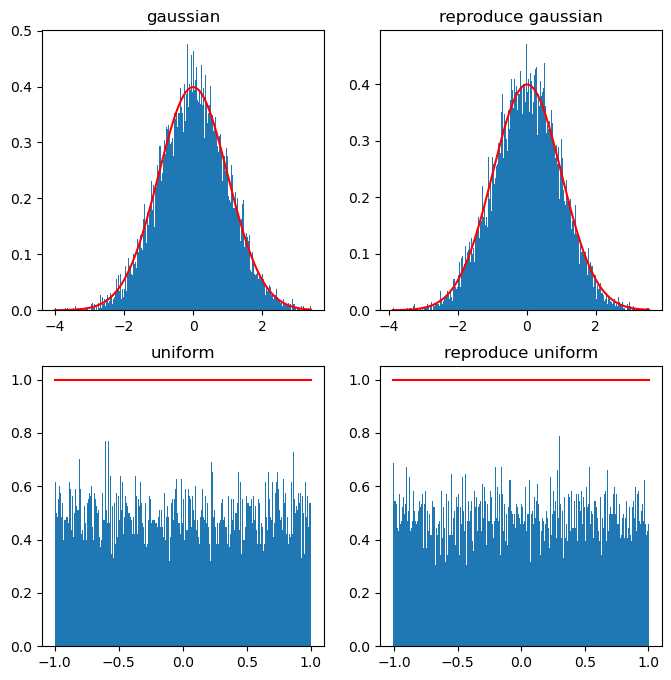

In [3]:
plt.figure(figsize=(8,8))

# numpy.random.normal生成的高斯分布的概率密度函数
plt.subplot(221)
n_g,bins_g,_=plt.hist(g,bins=256,density=True)
y_g=1/(np.sqrt(2*np.pi)*sigma)*np.exp(-(bins_g-mu)**2/(2*sigma**2))
plt.plot(bins_g,y_g,'r')
plt.title("gaussian")

# numpy.random.uniform生成的均匀分布的概率密度函数
plt.subplot(223)
n_u,bins_u,_=plt.hist(u,bins=256,density=True)
plt.plot(bins_u,np.ones_like(bins_u),color='r')
plt.title("uniform")

# numpy.mean和numpy.var二次计算高斯噪声均值和方差
plt.subplot(222)
mu_g=np.mean(g)
sigma_g=np.var(g)
print(mu_g,sigma_g)
g_2=np.random.normal(mu_g,sigma_g,N) # 用二次求出的均值和方差绘制的高斯分布概率密度函数
n_g_2,bins_g_2,_=plt.hist(g_2,bins=256,density=True)
y_g_2=1/(np.sqrt(2*np.pi)*sigma_g)*np.exp(-(bins_g_2-mu_g)**2/(2*sigma_g**2))
plt.plot(bins_g_2,y_g_2,'r')
plt.title("reproduce gaussian")

# numpy.mean和numpy.var二次计算均匀噪声均值和方差
plt.subplot(224)
mu_u=np.mean(u)
sigma_u=np.var(u)
print(mu_u,sigma_u)
def ab(mu,sigma):
    result_a=mu+np.sqrt(3)*np.sqrt(sigma)
    result_b=mu-np.sqrt(3)*np.sqrt(sigma)
    result=np.array([result_a,result_b])
    return result
u_2=np.random.uniform(ab(mu_u,sigma_u)[1],ab(mu_u,sigma_u)[0],N) # 用二次求出的均值和方差绘制的高斯分布概率密度函数
n_u_2,bins_u_2,_=plt.hist(u_2,bins=256,density=True)
plt.plot(bins_u_2,np.ones_like(bins_u_2),color='r')
plt.title("reproduce uniform")

## （4）利用生成的10000点高斯噪声，计算其自相关，绘制自相关波形。

维基百科中，对自相关（autocorrelation）定义如下：Autocorrelation, sometimes known as serial correlation in the discrete time case, is the correlation of a signal with a delayed copy of itself as a function of delay. 其公式为：
$$
R_{ff}(l)=\sum\limits_{n=0}^{N}f(n)f(n-l)
$$

Text(0.5, 1.0, 'autocorrelation')

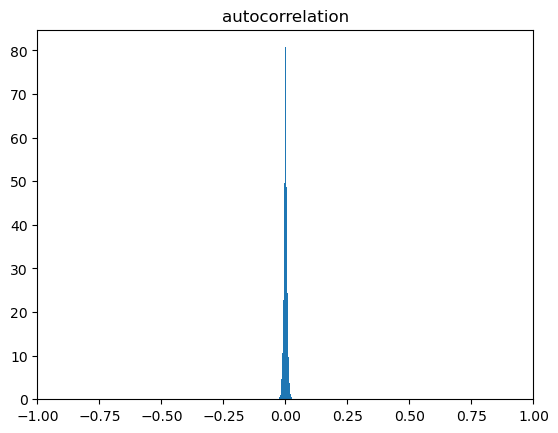

In [4]:
g_acorr=np.correlate(g_2,g_2,'full')[len(g_2)-1:] 
g_acorr=g_acorr/sigma_g/len(g_acorr)
n_g_3,bins_g_3,_=plt.hist(g_acorr,bins=1024,density=True)
plt.xlim(-1, 1)
plt.title("autocorrelation")

## (5)  利用生成的10000点高斯噪声，计算其DFT变换，并绘DFT幅度波形。

Text(0.5, 1.0, 'dft')

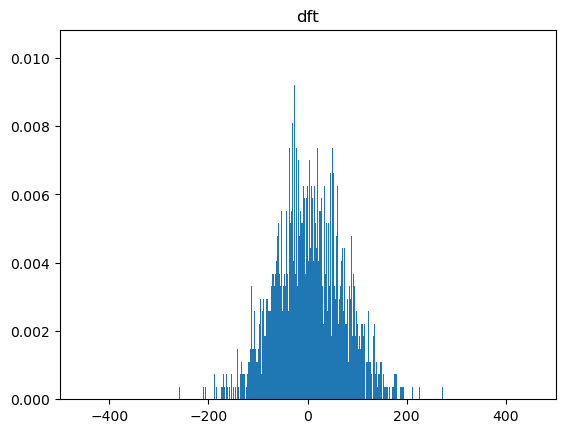

In [5]:
g_dft=np.fft.fftshift(np.fft.fft(g_2))
n_g_4,bins_g_4,_=plt.hist(np.real(g_dft),bins=1024,density=True)
plt.xlim(-500, 500)
plt.title('dft')